<a href="https://www.kaggle.com/code/div0108/crm-data-analysis?scriptVersionId=182504934" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("../input/credit-risk-modelling-example/data.csv",low_memory=False)

In [3]:
df.shape

(855969, 73)

In [4]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,NaN,NaN,3,0,13648,83.7,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01-04-1999,5,NaN,NaN,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,NaN,NaN,2,0,2956,98.5,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01-02-1996,1,35.0,NaN,10,0,5598,21.0,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01-01-1996,0,38.0,NaN,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,01-12-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,01-11-2004,3,NaN,NaN,9,0,7963,28.3,12,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,01-01-2015,161.03,NaN,01-09-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,01-12-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,01-07-2005,1,NaN,NaN,7,0,17726,85.6,11,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,01-01-2016,170.08,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,Na

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,442.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.362036,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.235026,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.190000,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.750000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [8]:
missingval = df.isnull().sum()
missingval = missingval[missingval > 0]

In [9]:
missingval

emp_title                       49443
emp_length                      43061
desc                           734159
title                              34
mths_since_last_delinq         439812
mths_since_last_record         724785
revol_util                        446
last_pymnt_d                     8862
next_pymnt_d                   252971
last_credit_pull_d                 50
collections_12_mths_ex_med         56
mths_since_last_major_derog    642830
annual_inc_joint               855527
dti_joint                      855527
verification_status_joint      855527
tot_coll_amt                    67313
tot_cur_bal                     67313
open_acc_6m                    842681
open_il_6m                     842681
open_il_12m                    842681
open_il_24m                    842681
mths_since_rcnt_il             843035
total_bal_il                   842681
il_util                        844360
open_rv_12m                    842681
open_rv_24m                    842681
max_bal_bc  

In [10]:
misper = (missingval / df.shape[0]) * 100

In [11]:
misper

emp_title                       5.776261
emp_length                      5.030673
desc                           85.769344
title                           0.003972
mths_since_last_delinq         51.381767
mths_since_last_record         84.674211
revol_util                      0.052105
last_pymnt_d                    1.035318
next_pymnt_d                   29.553757
last_credit_pull_d              0.005841
collections_12_mths_ex_med      0.006542
mths_since_last_major_derog    75.099682
annual_inc_joint               99.948363
dti_joint                      99.948363
verification_status_joint      99.948363
tot_coll_amt                    7.863953
tot_cur_bal                     7.863953
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_12m                    98.447607
open_il_24m                    98.447607
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
il_util                        98.643759
open_rv_12m     

In [12]:
drop = misper[misper > 50].index
drop

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [13]:
# List of columns to keep
cols_to_keep = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
                'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']

# Create a new DataFrame with only the selected columns
df = df[cols_to_keep]

In [14]:
missingval = df.isnull().sum()
missingval = missingval[missingval > 0]
misper = (missingval / df.shape[0]) * 100
drop = misper[misper > 50].index
drop

Index([], dtype='object')

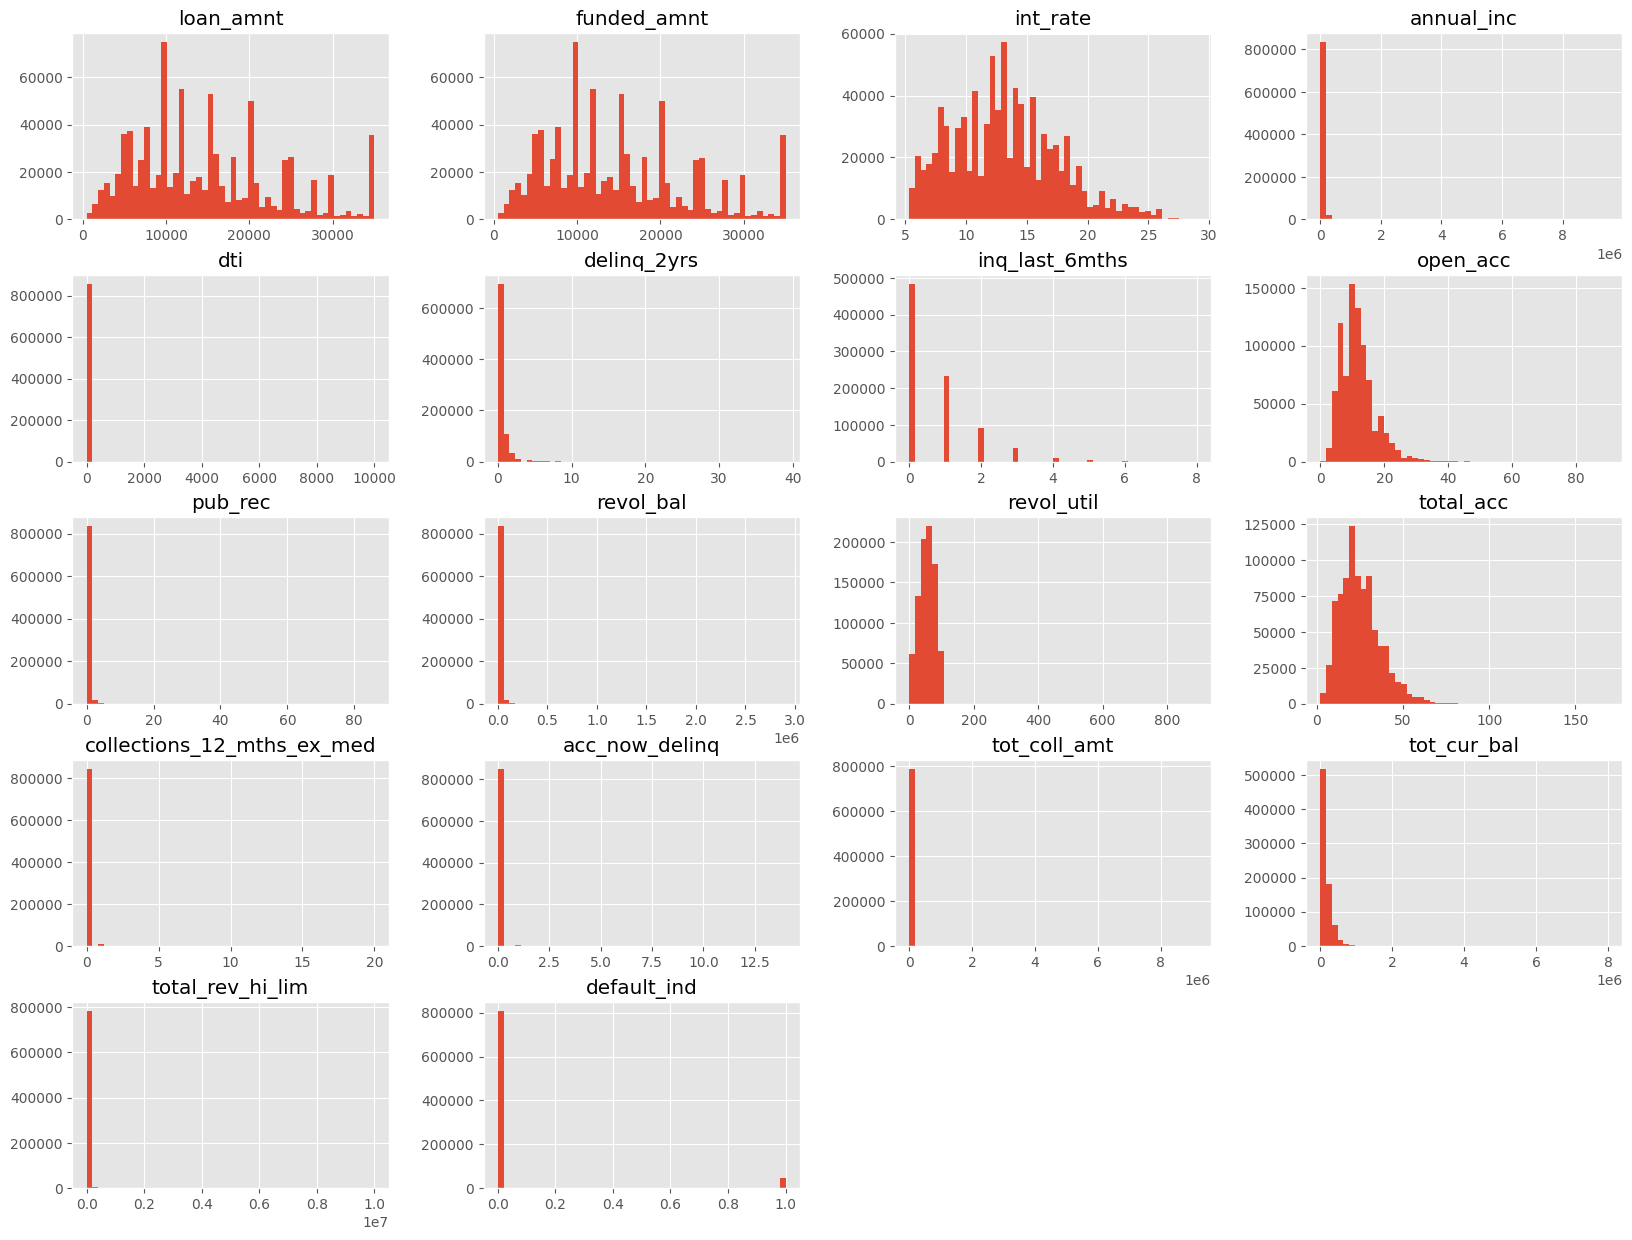

In [15]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(20, 15), bins=50)
plt.show()

In [16]:
df.shape

(855969, 25)

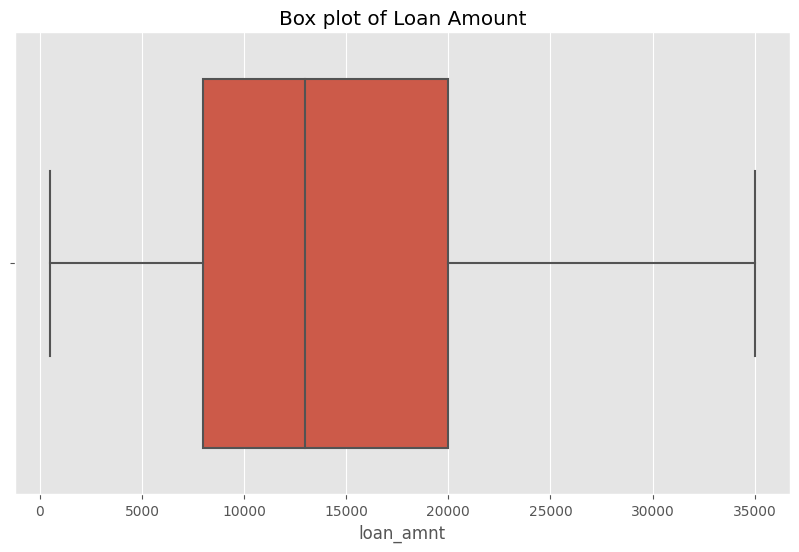

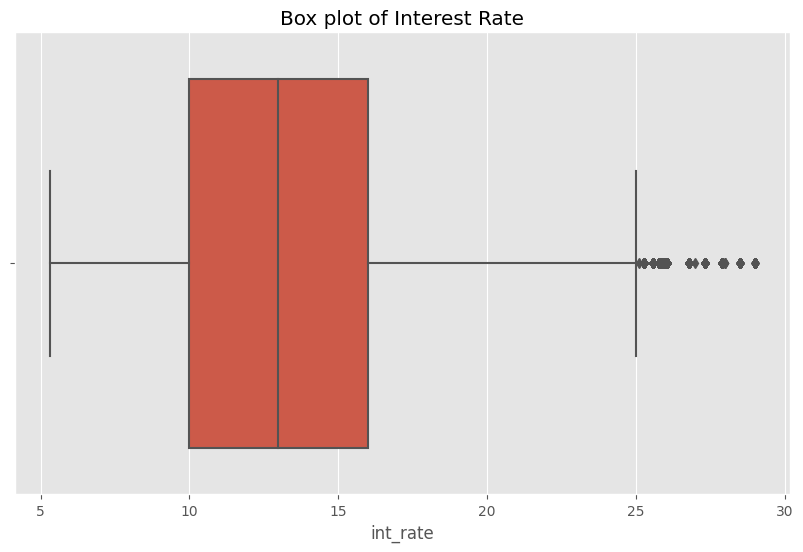

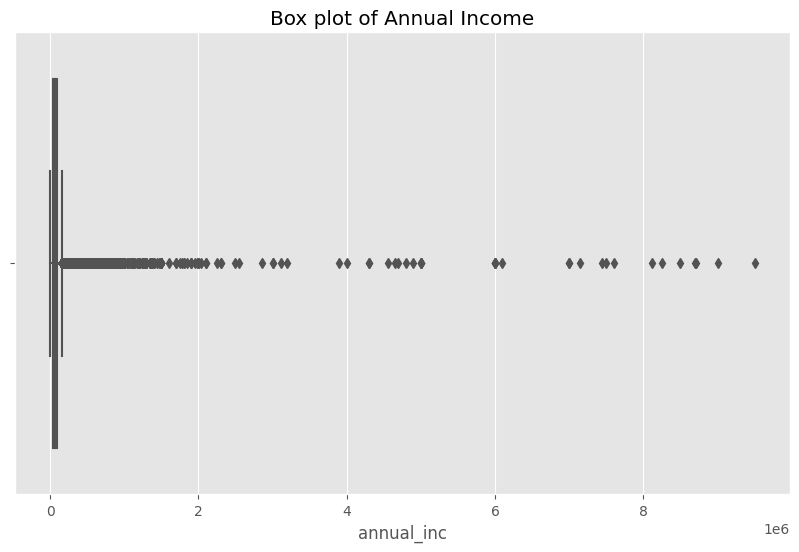

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Box plot of Loan Amount')
plt.show()
# Box plot for 'int_rate'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['int_rate'])
plt.title('Box plot of Interest Rate')
plt.show()

# Box plot for 'annual_inc'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Box plot of Annual Income')
plt.show()



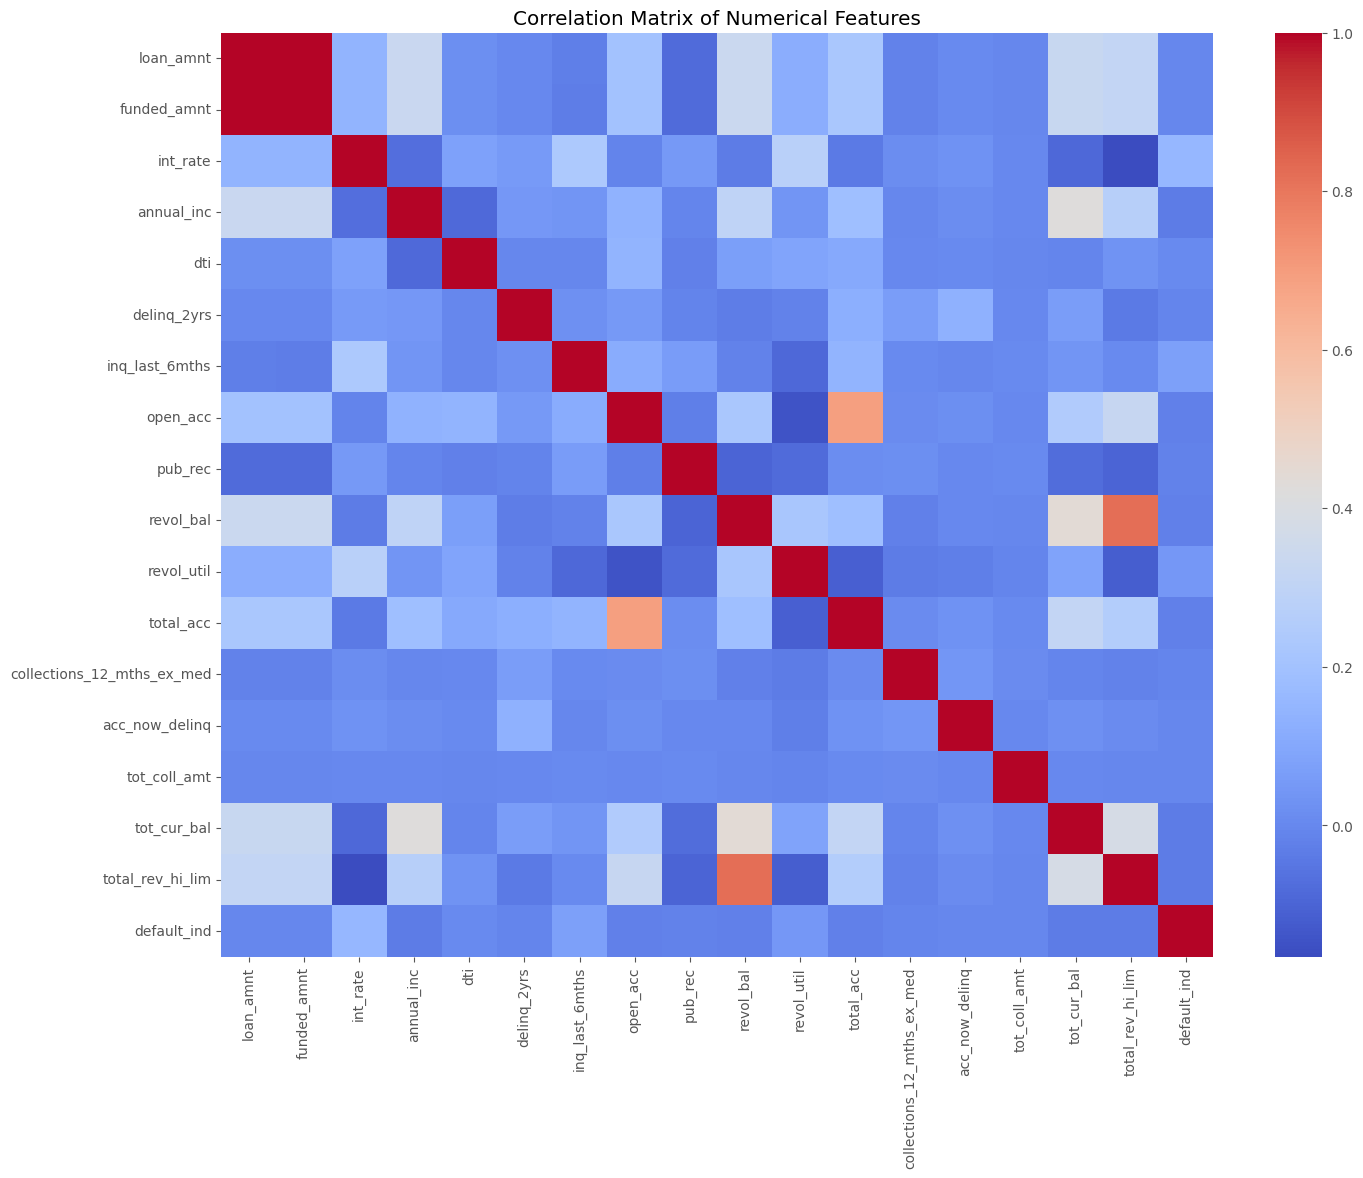

In [18]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
column_names_mapping = {
    'loan_amnt': 'loan_amount',
    'funded_amnt': 'funded_amount',
    'term': 'loan_term',
    'int_rate': 'interest_rate',
    'grade': 'loan_grade',
    'sub_grade': 'loan_sub_grade',
    'emp_length': 'employment_length',
    'home_ownership': 'home_ownership_status',
    'annual_inc': 'annual_income',
    'verification_status': 'income_verification_status',
    'dti': 'debt_to_income_ratio',
    'delinq_2yrs': 'delinquencies_last_2_years',
    'earliest_cr_line': 'credit_history_length',
    'inq_last_6mths': 'recent_credit_inquiries',
    'open_acc': 'open_accounts',
    'pub_rec': 'public_records',
    'revol_bal': 'revolving_balance',
    'revol_util': 'revolving_utilization_ratio',
    'total_acc': 'total_accounts',
    'collections_12_mths_ex_med': 'non_medical_collections_last_12_months',
    'acc_now_delinq': 'currently_delinquent_accounts',
    'tot_coll_amt': 'total_collection_amount',
    'tot_cur_bal': 'total_current_balance',
    'total_rev_hi_lim': 'total_revolving_credit_limit',
    'default_ind': 'loan_default_indicator'
}

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

# Rename columns using the dictionary
df_copy.rename(columns=column_names_mapping, inplace=True)

In [20]:
df_copy.to_csv('final_dataset.csv', index=False)